**Membres de groupe:**


*   BENRGUIG AYYOUB
*   MANSOURI ACHRAF
*   SAMI YOUSSEF

porte_feuille.jpg



Dans cette problématique, l'utilisation d'une distribution de probabilité de mélange (mixture distribution) devient pertinente. Cela implique de considérer la somme des rendements de deux classes d'actifs, chacune suivant une distribution probabiliste différente. Par exemple, on pourrait avoir une classe d'actifs représentant des actions, dont les rendements suivent une distribution normale, et une autre classe représentant des obligations, avec une distribution différente. La combinaison pondérée de ces deux distributions forme le modèle de rendements du portefeuille global.

Les implications de cette approche vont au-delà de la simple agrégation des rendements. Elles touchent la gestion des risques, la prise de décision d'allocation d'actifs et la construction de portefeuilles équilibrés. En effet, la diversification peut permettre de réduire la volatilité du portefeuille global en exploitant les caractéristiques complémentaires des différentes classes d'actifs.

Ainsi, cette problématique offre un cadre d'étude riche pour développer des modèles statistiques avancés, explorer les interactions entre les classes d'actifs et élaborer des stratégies d'investissement robustes dans un contexte financier en perpétuelle évolution. La modélisation de la somme des rendements de deux classes d'actifs avec des distributions de probabilité différentes constitue donc une pierre angulaire pour la compréhension et l'amélioration des performances des portefeuilles dans le domaine financier.


#  **Import les bibliothèque**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy, laplace


# ***Description de la fonction du problème:***



La fonction `mixture_distribution` modélise la somme de deux variables aléatoires indépendantes, $X$ et $Y$, en utilisant une distribution de mélange. Cette fonction est définie comme suit :

\\
$$ f(x) = w \cdot f_1(x) + (1 - w) \cdot f_2(x)$$





\\

où :
- $x$ : est la variable aléatoire représentant les valeurs possibles de la somme $Z = X + Y$.
- $w$ est le poids ou la proportion attribuée à la première variable aléatoire $X$.
- $f_1(x)$ et $f_2(x)$ sont les fonctions de densité de probabilité associées aux lois de probabilité de $X$ et $Y$ respectivement.

La fonction utilise la densité de probabilité normale $pdf$ pour modéliser les distributions $f_1(x)$ et $f_2(x)$ des variables aléatoires $X$ et $Y$. Les paramètres de chaque distribution sont spécifiés par $mu_1$, $sigma_1$ pour $f_1(x)$ et $mu_2$, $sigma_2$ pour $f_2(x)$. Ainsi, la fonction `mixture_distribution` est paramétrée par $w$, $mu_1$, $\sigma_1$, $mu_2$, et $\sigma_2$.

La distribution résultante \(f(x)\) représente la densité de probabilité de la somme $Z = X + Y$. L'utilisation d'une distribution de mélange est pertinente lorsque les variables aléatoires $X$ et $Y$ suivent des lois de probabilité différentes. Cette approche permet de modéliser des situations où la somme de deux variables aléatoires peut exhiber des comportements complexes.

Notions mathématiques associées à la fonction :
- $w$\, $mu_1$\, $\sigma_1$\, $mu_2$ , $\sigma_2$ : Paramètres de la fonction de mélange.
- $f_1(x)$ : Fonction de densité de probabilité de la première variable aléatoire $X$.
- $f_2(x)$ : Fonction de densité de probabilité de la deuxième variable aléatoire $Y$.
- $f(x)$ : Fonction de densité de probabilité résultante de la somme $Z = X + Y$.
- $N(\mu, \sigma^2)$ : Loi normale avec moyenne $mu$ et variance $\sigma^2$.
- $norm.pdf(x, \mu, \sigma)$ : Fonction de densité de probabilité de la loi normale avec moyenne \(\mu\) et variance $\sigma^2$ évaluée en $x$.
- Densité de probabilité de mélange : $f(x) = w \cdot f_1(x) + (1 - w) \cdot f_2(x)$ représente la densité de probabilité de la somme $Z = X + Y$ en utilisant une distribution de mélange.

Cette fonction est essentielle pour la modélisation probabiliste de la somme de variables aléatoires, offrant une approche flexible et puissante pour analyser les propriétés statistiques de la variable résultante.




In [ ]:
# définition de la fonction:
def mixture_distribution(x, w, mu1, sigma1, mu2, sigma2):
    pdf1 = w * norm.pdf(x, mu1, sigma1)
    pdf2 = (1 - w) * norm.pdf(x, mu2, sigma2)
    return pdf1 + pdf2

# Paramètres de la distribution de mélange
w = 0.7
mu1, sigma1 = 0, 1
mu2, sigma2 = 4, 2

# Générer des données pour le tracé
x = np.linspace(-5, 10, 1000)
y = mixture_distribution(x, w, mu1, sigma1, mu2, sigma2)

# Tracer la distribution de mélange
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Distribution de mélange')
plt.title('Distribution de Mélange de Deux Normales')
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.legend()
plt.grid(True)
plt.show()


# ***Algorithme d'échantionnage***

### **Algorithme Metropolis-Hastings (MH)**

L'algorithme Metropolis-Hastings représente une technique avancée d'échantillonnage dans le cadre de la méthode Markov Chain Monte Carlo (MCMC), fréquemment employée pour obtenir des échantillons d'une distribution cible, particulièrement lorsque l'échantillonnage direct à partir de cette distribution s'avère complexe.

L'idée fondamentale de cet algorithme réside dans la création d'une chaîne de Markov dont la distribution stationnaire correspond à la distribution cible. Les étapes clés de l'algorithme Metropolis-Hastings sont les suivantes :

* **Initialisation :** Définir un état initial pour la chaîne de Markov.

* **Itérations :**
  Pour chaque itération :
  - Proposer un nouvel état candidat en utilisant une distribution de proposition.
  - Calculer la probabilité d'acceptation pour la transition de l'état actuel au nouvel état candidat en comparant les densités de la distribution cible aux deux états.
  - Accepter ou rejeter le nouvel état candidat en fonction de cette probabilité d'acceptation.

* **Générer les échantillons :** Les états acceptés forment une séquence d'échantillons représentatifs de la distribution cible.

L'algorithme MH assure que, avec un nombre suffisant d'itérations, les échantillons produits convergent vers la distribution cible. La sélection judicieuse de la distribution de proposition et le réglage approprié des paramètres sont cruciaux pour garantir une exploration efficace de l'espace d'échantillonnage.

Dans ce contexte particulier, l'algorithme Metropolis-Hastings est employé pour échantillonner à partir de la distribution cible du modèle de mouvement brownien géométrique (GBM), visant à simuler les prix des actifs financiers à différents moments. Des distributions de proposition telles que la distribution de Cauchy, de Laplace, de Student-t et uniforme sont utilisées pour proposer de nouveaux états candidats.

L'algorithme Metropolis-Hastings est largement adopté dans divers domaines, notamment la finance, la statistique bayésienne, et d'autres disciplines où l'échantillonnage à partir de distributions complexes est essentiel pour mener des analyses probabilistes et réaliser des estimations fiables.

In [ ]:
# Fonction de densité de probabilité de la distribution exponentielle
def exponential_distribution(x, lambda_param):
    return lambda_param * np.exp(-lambda_param * x)

# Fonction de densité de probabilité de la distribution de Laplace
def laplace_distribution(x, mu, b):
    return (1 / (2 * b)) * np.exp(-np.abs(x - mu) / b)

def metropolis_hastings(q, p, n_iterations, x0, *args):
    chain = [x0]

    for _ in range(1, n_iterations + 1):
        x_proposed = q(chain[-1], *args)
        alpha = min(1, (p(x_proposed) / p(chain[-1])) * (q(chain[-1], *args) / q(x_proposed, *args)))
        u = np.random.uniform()

        if u < alpha:
            chain.append(x_proposed)
        else:
            chain.append(chain[-1])

    return chain

# Paramètres de la distribution de mélange de deux normales
w = 0.7
mu1, sigma1 = 0, 1
mu2, sigma2 = 4, 2

# Fonction de densité de probabilité de la distribution cible (mélange de deux normales)
def target_distribution(x):
    pdf1 = w * norm.pdf(x, mu1, sigma1)
    pdf2 = (1 - w) * norm.pdf(x, mu2, sigma2)
    return pdf1 + pdf2

# Fonction de proposition (distribution de Cauchy centrée sur la valeur actuelle)
def proposal_distribution_cauchy(x_current):
    return x_current + cauchy.rvs()

# Fonction de proposition (distribution uniforme sur un intervalle donné)
def proposal_distribution_uniform(x_current, a, b):
    return x_current + np.random.uniform(low=a, high=b)

# Fonction de proposition (distribution normale centrée sur la valeur actuelle)
def proposal_distribution_normal(x_current):
    return x_current + np.random.normal()

# Fonction de proposition (distribution exponentielle avec paramètre lambda)
def proposal_distribution_exponential(x_current, lambda_param):
    return x_current + np.random.exponential(scale=1/lambda_param)

# Fonction de proposition (distribution de Laplace avec paramètres mu et b)

def proposal_distribution_laplace(x_current, mu, b):
    return x_current + laplace.rvs(loc=mu, scale=b)

# Exécuter l'algorithme Metropolis-Hastings avec différentes fonctions de proposition

n_iterations = 10000
x0 = 0
a, b = -5, 5  # Interval pour la distribution uniforme
lambda_param = 0.5  # Paramètre lambda de la distribution exponentielle
mu_laplace, b_laplace = 0, 1  # Paramètres mu et b de la distribution de Laplace

markov_chain_cauchy = metropolis_hastings(proposal_distribution_cauchy, target_distribution, n_iterations, x0)
markov_chain_uniform = metropolis_hastings(proposal_distribution_uniform, target_distribution, n_iterations, x0, a, b)
markov_chain_normal = metropolis_hastings(proposal_distribution_normal, target_distribution, n_iterations, x0)
markov_chain_exponential = metropolis_hastings(proposal_distribution_exponential, target_distribution, n_iterations, x0, lambda_param)
markov_chain_laplace = metropolis_hastings(proposal_distribution_laplace, target_distribution, n_iterations, x0, mu_laplace, b_laplace)

# Visualiser les chaînes de Markov générées
plt.figure(figsize=(16, 12))

# Plot des histogrammes des échantillons obtenus

plt.subplot(2, 3, 1)
plt.hist(markov_chain_cauchy, bins=30, density=True, color='skyblue', alpha=0.7)
plt.title('Distribution de Cauchy')

plt.subplot(2, 3, 2)
plt.hist(markov_chain_uniform, bins=30, density=True, color='lightgreen', alpha=0.7)
plt.title('Distribution Uniforme')

plt.subplot(2, 3, 3)
plt.hist(markov_chain_normal, bins=30, density=True, color='lightcoral', alpha=0.7)
plt.title('Distribution Normale')

plt.subplot(2, 3, 4)
plt.hist(markov_chain_exponential, bins=30, density=True, color='gold', alpha=0.7)
x_range_exponential = np.linspace(min(markov_chain_exponential), max(markov_chain_exponential), 1000)
plt.plot(x_range_exponential, exponential_distribution(x_range_exponential, lambda_param), color='orange', label='Exponentielle')
plt.title('Distribution Exponentielle')

plt.subplot(2, 3, 5)
plt.hist(markov_chain_laplace, bins=30, density=True, color='lightblue', alpha=0.7)
x_range_laplace = np.linspace(min(markov_chain_laplace), max(markov_chain_laplace), 1000)
plt.plot(x_range_laplace, laplace_distribution(x_range_laplace, mu_laplace, b_laplace), color='blue', label='Laplace')
plt.title('Distribution de Laplace')

# Plot de la distribution de mélange de deux normales
x_range = np.linspace(min(markov_chain_cauchy + markov_chain_uniform + markov_chain_normal),
                      max(markov_chain_cauchy + markov_chain_uniform + markov_chain_normal), 1000)
plt.subplot(2, 3, 6)
plt.plot(x_range, target_distribution(x_range), color='orange', label='Mélange de deux normales')
plt.title('Distribution de mélange de deux normales')

plt.tight_layout()
plt.show()


### **Algorithme de Gibbs**


L'algorithme de Gibbs est une méthode d'échantillonnage utilisée dans les modèles probabilistes pour générer des échantillons à partir de distributions multidimensionnelles. Il est particulièrement utile lorsqu'il est difficile de générer des échantillons directement à partir de la distribution conjointe. L'algorithme de Gibbs fonctionne en échantillonnant séquentiellement chaque variable aléatoire conditionnellement à toutes les autres.

### Étapes de l'algorithme :

1. **Initialisation :** Commencer par une valeur initiale pour chaque variable aléatoire.

2. **Itération :** Pour chaque itération :
   - Sélectionner une variable aléatoire.
   - Échantillonner cette variable conditionnellement à la valeur actuelle des autres variables.
   - Mettre à jour la valeur de la variable échantillonnée.
   - Répéter ce processus pour toutes les variables aléatoires dans un cycle, jusqu'à convergence ou jusqu'à atteindre le nombre d'itérations souhaité.

3. **Convergence :** L'algorithme converge vers la distribution cible après un grand nombre d'itérations. Les échantillons générés sont utilisés pour approximer les caractéristiques de la distribution jointe des variables.

L'algorithme de Gibbs est souvent utilisé dans les modèles bayésiens où il est difficile d'échantillonner directement à partir de la distribution jointe des variables, mais où les distributions conditionnelles peuvent être plus faciles à échantillonner. Cette méthode permet donc de contourner la difficulté d'échantillonnage direct et d'obtenir des échantillons représentatifs de la distribution cible.

In [ ]:
# Algorithme de Gibbs pour échantillonnage dans la distribution de mélange

def gibbs_sampling_for_mixture(iterations, w, mu1, sigma1, mu2, sigma2):
    samples = []
    current_sample = np.random.rand()

    for _ in range(iterations):
        # Échantillonnage de la première composante de la distribution de mélange
        current_sample = np.random.normal(mu1 + w * (current_sample - mu2) / sigma2, sigma1)
        samples.append(current_sample)

        # Échantillonnage de la deuxième composante de la distribution de mélange
        current_sample = np.random.normal(mu2 + (1 - w) * (current_sample - mu1) / sigma1, sigma2)
        samples.append(current_sample)

    return samples


In [ ]:
# Paramètres de la distribution de mélange
w = 0.7
mu1, sigma1 = 0, 1
mu2, sigma2 = 4, 2

# Nombre d'itérations pour l'algorithme de Gibbs
num_iterations = 1000

# Appliquer l'algorithme de Gibbs à la fonction mixture_distribution
samples = gibbs_sampling_for_mixture(num_iterations, w, mu1, sigma1, mu2, sigma2)


# Afficher l'histogramme des échantillons obtenus
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogramme des échantillons avec l\'algorithme de Gibbs et distribution de mélange')
plt.xlabel('Valeurs échantillonnées')
plt.ylabel('Densité de probabilité')
plt.grid(True)
plt.show()


# **Algorithmes d'optimisation**

### **Algorithme de recuit simulé**

Le recuit simulé se profile comme une méthode d'optimisation probabiliste inspirée du processus de recuit métallurgique. Cet outil est déployé pour sonder et améliorer l'espace des solutions d'un problème donné, particulièrement dans le contexte de l'échantillonnage de distributions complexes ou de la résolution de problèmes d'optimisation, où il permet une exploration approfondie tout en évitant les pièges des optima locaux moins souhaitables.

## **Principes fondamentaux du recuit simulé :**

* **Exploration probabiliste :** Le recuit simulé débute avec une solution initiale et explore l'espace des solutions en acceptant des déplacements qui peuvent améliorer la solution actuelle ou être moins favorables, le tout selon une probabilité spécifique.

* **Température :** La température joue un rôle central dans le recuit simulé. Initialement élevée, elle régit le niveau d'exploration de l'algorithme. À des températures plus élevées, l'algorithme est plus enclin à accepter des déplacements potentiellement conduisant à des solutions moins optimales, évitant ainsi de rester prisonnier d'optima locaux. À mesure que le processus avance, la température décroît graduellement, restreignant l'exploration et favorisant une convergence vers des solutions potentiellement meilleures.

* **Acceptation probabiliste :** L'algorithme accepte des solutions moins optimales avec une probabilité dépendant de la différence d'énergie (ou de coût) entre la solution actuelle et la solution candidate, ainsi que de la température actuelle. Cette acceptation probabiliste permet de s'affranchir des optima locaux, explorant ainsi des secteurs inexplorés de l'espace des solutions.

* **Refroidissement :** Le refroidissement représente un processus où la température diminue progressivement au fil du temps. Cette étape permet à l'algorithme de se concentrer progressivement sur des régions plus prometteuses de l'espace des solutions à mesure qu'il converge vers une solution potentiellement optimale.

## **Application du recuit simulé :**

Dans le domaine de l'échantillonnage de distributions complexes, le recuit simulé peut être employé pour générer des échantillons conformes à une distribution cible difficile à échantillonner directement. En ajustant la température et en acceptant des déplacements avec une probabilité contrôlée, le recuit simulé peut scruter l'espace des solutions pour produire des échantillons approximatifs alignés sur la distribution cible.

Cette approche probabiliste contourne ainsi les défis liés à l'échantillonnage direct, offrant une méthode robuste pour explorer des distributions complexes et optimiser des problèmes difficiles, là où d'autres approches pourraient montrer leurs limites.

In [ ]:
def calculer_energie_melange(x, w, mu1, sigma1, mu2, sigma2):
    pdf1 = w * norm.pdf(x, mu1, sigma1)
    pdf2 = (1 - w) * norm.pdf(x, mu2, sigma2)
    pdf_melange = pdf1 + pdf2
    return -np.log(pdf_melange)
def voisin(s):
    # Générer un voisin en ajoutant un bruit gaussien
    return s + np.random.normal(0, 0.1)

def temp(k, kmax):
    # Fonction de température (peut être ajustée selon vos besoins)
    return 1.0 - k / kmax

def recuit_simule_melange(initial_state, kmax, emax, w, mu1, sigma1, mu2, sigma2):
    s = initial_state
    g = s
    e = calculer_energie_melange(s, w, mu1, sigma1, mu2, sigma2)
    m = e
    k = 0

    states = [s]
    energies = [e]
    temperatures = [temp(k, kmax)]

    while k < kmax and e > emax:
        sn = voisin(s)
        en = calculer_energie_melange(sn, w, mu1, sigma1, mu2, sigma2)

        if en < e or np.random.rand() < np.exp((e - en) / temp(k, kmax)):
            s = sn
            e = en

        if e < m:
            g = s
            m = e

        k += 1
        states.append(s)
        energies.append(e)
        temperatures.append(temp(k, kmax))

    return g, states, energies, temperatures

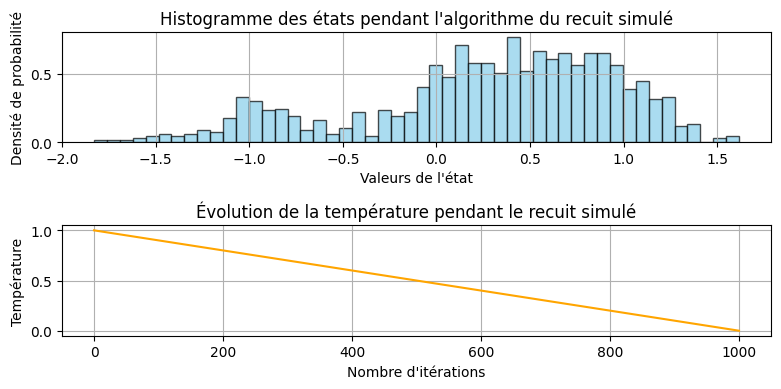

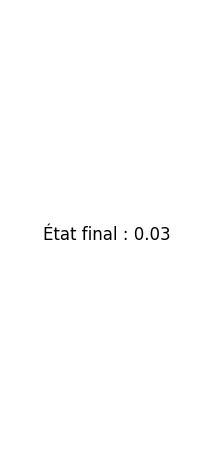

In [ ]:

# Appliquer l'algorithme du recuit simulé à la fonction de mélange
# Paramètres pour l'algorithme du recuit simulé
# Paramètres pour la distribution de mélange

w = 0.7
mu1, sigma1 = 0, 1
mu2, sigma2 = 4, 2
initial_state = 0.0
kmax = 1000
emax = 1e-6

best_state = recuit_simule_melange(initial_state, kmax, emax, w, mu1, sigma1, mu2, sigma2)

# Appliquer l'algorithme du recuit simulé à la fonction de mélange
best_state, states, energies, temperatures = recuit_simule_melange(
    initial_state, kmax, emax, w, mu1, sigma1, mu2, sigma2
)

# Afficher les résultats
plt.figure(figsize=(8, 4))

# Histogramme des états
plt.subplot(2, 1, 1)
plt.hist(states, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Histogramme des états pendant l'algorithme du recuit simulé")
plt.xlabel("Valeurs de l'état")
plt.ylabel("Densité de probabilité")
plt.grid(True)

# Graphique de l'évolution de la température
plt.subplot(2, 1, 2)
plt.plot(range(len(temperatures)), temperatures, color='orange')
plt.title("Évolution de la température pendant le recuit simulé")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Température")
plt.grid(True)

plt.tight_layout()
plt.show()
# Affichage de la valeur de l'état final
plt.subplot(1, 3, 3)
plt.text(0.5, 0.5, f'État final : {best_state:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

# ***Algorithme génétique***

**Les algorithmes génétiques** (AG) sont des techniques d'optimisation inspirées par la sélection naturelle et la génétique. Ils sont couramment utilisés pour résoudre des problèmes d'optimisation dans divers domaines. Voici une explication générale de l'algorithme génétique en optimisation d'une fonction :

### 1. **Initialisation de la population :**
   - Une population initiale de solutions potentielles est générée de manière aléatoire. Chaque solution représente un individu dans la population.

### 2. **Évaluation de la population :**
   - Chaque individu de la population est évalué en utilisant la fonction objectif (fonction à optimiser). Les individus qui sont meilleurs selon la fonction objectif ont une meilleure chance d'être sélectionnés pour la reproduction.

### 3. **Sélection :**
   - Les individus sont sélectionnés pour la reproduction en fonction de leur performance (valeur de la fonction objectif). Les individus performants ont plus de chances d'être choisis, mais des individus moins performants peuvent également être sélectionnés pour maintenir la diversité génétique.

### 4. **Reproduction :**
   - Les individus sélectionnés sont utilisés pour créer une nouvelle génération d'individus. Cela se fait généralement par croisement (crossover) et mutation.
     - **Croisement (Crossover) :** Des parties des solutions de deux parents sont échangées pour créer des descendants.
     - **Mutation :** Des modifications aléatoires sont apportées aux solutions pour introduire une diversité génétique.

### 5. **Remplacement :**
   - La nouvelle génération remplace l'ancienne. Certains individus peuvent être transférés directement, tandis que d'autres peuvent être le résultat de croisements et de mutations.

### 6. **Critère d'arrêt :**
   - L'algorithme continue à itérer à travers les étapes 2 à 5 jusqu'à ce qu'un certain critère d'arrêt soit atteint, tel qu'un nombre maximum d'itérations, une convergence suffisante, ou l'atteinte d'une solution satisfaisante.

### 7. **Résultat :**
   - La meilleure solution trouvée après l'arrêt de l'algorithme est la solution optimale (ou une approximation de celle-ci) pour la fonction objectif.

L'idée fondamentale derrière les algorithmes génétiques est de simuler le processus de sélection naturelle pour guider la recherche d'une solution optimale. L'utilisation du croisement et de la mutation permet d'explorer l'espace des solutions de manière efficace. Cependant, l'efficacité de l'algorithme dépend des paramètres tels que la taille de la population, les taux de croisement et de mutation, et le critère d'arrêt choisi. Ces paramètres doivent souvent être ajustés empiriquement pour obtenir de bons résultats.

In [ ]:
# Définir les paramètres de l'algorithme génétique
pop_size = 100 # Taille de la population
gen_size = 50 # Taille du génome
cross_rate = 0.8 # Taux de croisement
mut_rate = 0.01 # Taux de mutation
max_iter = 100 # Nombre maximal d'itérations

# Initialiser la population aléatoirement

pop = np.random.randint(0, 2, (pop_size, gen_size))

# Définir la fonction de fitness
def fitness(pop):
  # Convertir les génomes binaires en nombres réels
  x = pop.dot(2 ** np.arange(gen_size)[::-1]) / (2 ** gen_size - 1) * 10 - 5

  y = mixture_distribution(x, w, mu1, sigma1, mu2, sigma2)

  return y

# Définir la fonction de sélection
def selection(pop, fitness):
  # Calculer les probabilités de sélection proportionnelles à la fitness
  probs = fitness / fitness.sum()
  # Tirer aléatoirement des individus selon les probabilités
  idx = np.random.choice(np.arange(pop_size), size=pop_size, replace=True, p=probs)
  # Retourner la nouvelle population
  return pop[idx]

# Définir la fonction de croisement
def crossover(pop, cross_rate):
  # Créer une copie de la population
  new_pop = pop.copy()
  # Parcourir la population par paires
  for i in range(0, pop_size, 2):
    # Tirer aléatoirement un nombre entre 0 et 1
    r = np.random.rand()
    # Si le nombre est inférieur au taux de croisement
    if r < cross_rate:
      # Tirer aléatoirement un point de coupure
      c = np.random.randint(0, gen_size)
      # Échanger les parties droites des génomes des deux individus
      new_pop[i, c:] = pop[i + 1, c:]
      new_pop[i + 1, c:] = pop[i, c:]
  # Retourner la nouvelle population
  return new_pop

# Définir la fonction de mutation
def mutation(pop, mut_rate):
  # Créer une copie de la population
  new_pop = pop.copy()
  # Parcourir la population
  for i in range(pop_size):
    # Parcourir le génome
    for j in range(gen_size):
      # Tirer aléatoirement un nombre entre 0 et 1
      r = np.random.rand()
      # Si le nombre est inférieur au taux de mutation
      if r < mut_rate:
        # Inverser le bit à la position j
        new_pop[i, j] = 1 - pop[i, j]
  # Retourner la nouvelle population
  return new_pop

# Créer une liste pour stocker l'historique de la fitness maximale
max_fitness = []

# Répéter l'algorithme génétique jusqu'à atteindre le nombre maximal d'itérations
for i in range(max_iter):
  # Calculer la fitness de la population
  fit = fitness(pop)
  # Sélectionner les individus les plus aptes
  pop = selection(pop, fit)
  # Appliquer le croisement
  pop = crossover(pop, cross_rate)#
  # Appliquer la mutation
  pop = mutation(pop, mut_rate)
  # Enregistrer la fitness maximale de la population
  max_fitness.append(fit.max())

# Afficher la fitness maximale finale
print("Fitness maximale :", max_fitness[-1])

# Afficher l'évolution de la fitness maximale
plt.plot(max_fitness)
plt.xlabel("Itération")
plt.ylabel("Fitness maximale")
plt.show()

Fitness maximale : 0.28729277416446086
